In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from matplotlib import pyplot
from matplotlib.image import imread
from tensorflow.keras import models, layers

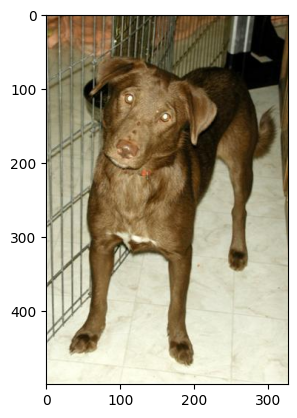

In [ ]:
image = imread('/content/drive/MyDrive/PetImages/PetImages/train/dog/1.jpg')
pyplot.imshow(image)
pyplot.show()


In [ ]:
train_dir = '/content/drive/MyDrive/PetImages/PetImages/train'
test_dir = '/content/drive/MyDrive/PetImages/PetImages/test'

In [ ]:
model = models.Sequential() #똑같은걸 계속 덧붙인다
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(128,128,3))) #CNN 32 #1층
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation='relu')) #CNN 64, 커널 64개 #2층
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten()) #펼치기
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))
#Model 함수는 2개의 신경망을 덧붙이는 함수

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) #어떻게 학습할지 정의

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, #0부터 1사이 숫자로 바꿔주기, 기울거나 zooming을 하거나 이런식으로 한장에 대해서 여러장을 만들어서 학습
  zoom_range = 0.2, horizontal_flip = True) #batch가 20이면 1장당 이렇게 부풀려서 쓰기, 한장에 대해 정보를 더 얻을 수 있음 이미지는 2d지만 현실을 3d이므로

test_datagen = ImageDataGenerator(rescale = 1./255) #test 데이터는 걍 놔두기

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir, #읽어오기
    target_size=(128, 128), #크기가 제가각이면 안되니 타겟 사이즈 지정
    batch_size=20,
    class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=20,
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
history = model.fit( #모델 만들기
    train_generator, steps_per_epoch = 10, epochs=10,
    validation_data=test_generator, validation_steps=5) #이미지는 train_gernator, test_generator가 필요함

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 121s 12s/step - accuracy: 0.5116 - loss: 1.8393 - val_accuracy: 0.4200 - val_loss: 0.8060
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 6s/step - accuracy: 0.5014 - loss: 0.7348 - val_accuracy: 0.5200 - val_loss: 0.6867
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.5664 - loss: 0.6800 - val_accuracy: 0.4800 - val_loss: 0.6733
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.5353 - loss: 0.6865 - val_accuracy: 0.4800 - val_loss: 0.6987
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.5432 - loss: 0.6708 - val_accuracy: 0.5200 - val_loss: 0.7116
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.6027 - loss: 0.6607 - val_accuracy: 0.5400 - val_loss: 0.6745
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.6796 - loss: 0.6387 - val_accuracy: 0.5000 - val_loss: 0.7485
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.5645 - loss: 0.6904 - val_accuracy: 0.5500 - val_los

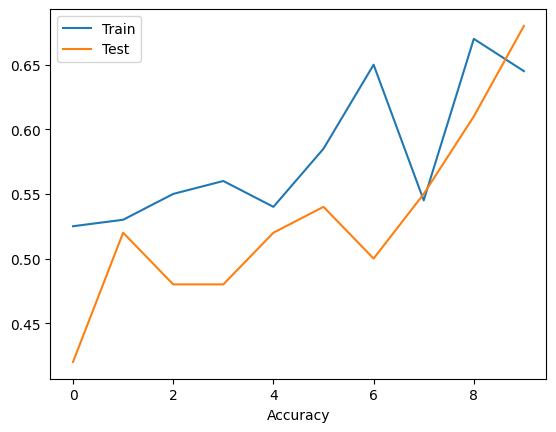

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.xlabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os

# Get a list of all image files in the test directory for dogs
test_dog_files = os.listdir(os.path.join(test_dir, 'dog'))

# Select one image file (e.g., the first one)
img_path = os.path.join(test_dir, 'dog', test_dog_files[0])

# Load and preprocess the image
#숫자로 바꾸는 방법
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) #이미지를 일열로 펼친다
img_array = np.expand_dims(img_array, axis=0) #차원을 증대 batch가 20장이고 rgb이니까 4차원
img_array /= 255.  # Rescale the image

# Make a prediction
prediction = model.predict(img_array)

# Print the prediction
if prediction[0] > 0.5:
    print(f"Prediction: Dog ({prediction[0]})")
else:
    print(f"Prediction: Cat ({prediction[0]})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Prediction: Dog ([0.6626325])


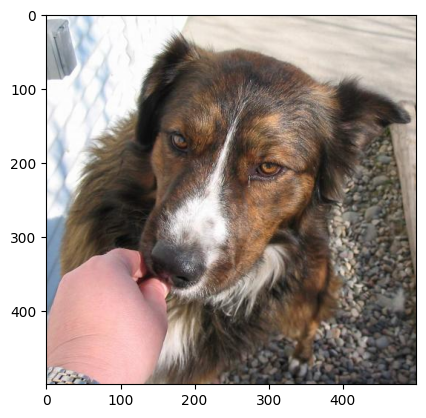

In [ ]:
image = imread(img_path)
pyplot.imshow(image)
pyplot.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os

# Get a list of all image files in the test directory for dogs
test_cat_files = os.listdir(os.path.join(test_dir, 'cat'))

# Select one image file (e.g., the first one)
img_path = os.path.join(test_dir, 'cat', test_cat_files[0])

# Load and preprocess the image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Rescale the image

# Make a prediction
prediction = model.predict(img_array)

# Print the prediction
if prediction[0] > 0.5:
    print(f"Prediction: Dog ({prediction[0]})")
else:
    print(f"Prediction: Cat ({prediction[0]})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Prediction: Dog ([0.66877323])


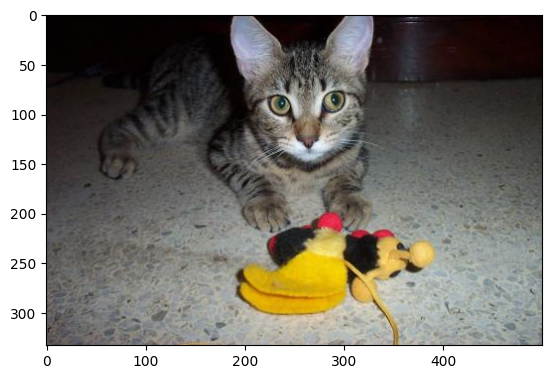

In [ ]:
image = imread(img_path)
pyplot.imshow(image)
pyplot.show()

In [ ]:
model.save("my_model.keras") #스스로 만든 모델